In [1]:
%matplotlib inline

import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

/Users/Tako/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Tako/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train_housing = pd.read_csv("train.csv")
test_housing = pd.read_csv("test.csv")

In [23]:
train_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
print train_housing.shape

(1460, 81)


In [25]:
test_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print test_housing.shape

(1459, 80)


In [7]:
train_housing.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [8]:
train_housing.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [3]:
null_vals = train_housing.apply(lambda col: col == 0 | col.isnull()).sum()
null_vals[null_vals != 0]

MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
2ndFlrSF          829
LowQualFinSF     1434
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
BedroomAbvGr        6
KitchenAbvGr        1
Fireplaces        690
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

In [27]:
train_housing['Electrical'][train_housing['Electrical'].isnull()]

1379    NaN
Name: Electrical, dtype: object

In [28]:
train_housing.apply(lambda col: col.isnull()).mean().value_counts()

0.000000    62
0.055479     5
0.025342     3
0.005479     2
0.026027     2
0.472603     1
0.807534     1
0.995205     1
0.177397     1
0.000685     1
0.937671     1
0.963014     1
dtype: int64

In [4]:
null_vals[null_vals > len(train_housing)/2].index

Index([u'MasVnrArea', u'BsmtFinSF2', u'2ndFlrSF', u'LowQualFinSF',
       u'BsmtFullBath', u'BsmtHalfBath', u'HalfBath', u'WoodDeckSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea',
       u'MiscVal'],
      dtype='object')

In [268]:
# Drop columns that are more than half empty 
#train_housing_trimmed = train_housing.drop(null_vals[null_vals > len(train_housing)/2].index,1)
#train_housing_trimmed = train_housing
train_housing_trimmed = train_housing.drop([15])

In [269]:
train_data, train_price = train_housing_trimmed.loc[:,'Id':'SaleCondition'], train_housing_trimmed['SalePrice']

In [324]:
#test_data = test_housing.drop(null_vals[null_vals > len(train_housing)/2].index,1)
#test_data = test_housing
test_data = test_housing.drop([15])

In [8]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
train_housing_trimmed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Y,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Y,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Y,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Y,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Y,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


TypeError: histogram() got an unexpected keyword argument 'new'

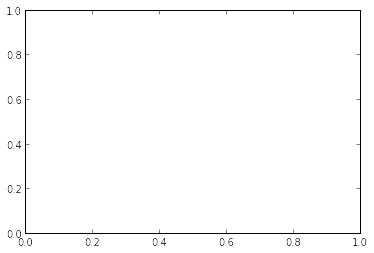

In [10]:
train_price.hist()

In [11]:
X = pd.DataFrame(train_price.values.reshape(-1, 1))

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
km.cluster_centers_

array([[294385.46567164],
       [147134.05777778]])

In [84]:
labels = km.predict(X)
labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [85]:
dists = km.transform(X)
dists

array([[  61365.94222222,   85885.46567164],
       [  34365.94222222,  112885.46567164],
       [  76365.94222222,   70885.46567164],
       ..., 
       [ 119365.94222222,   27885.46567164],
       [   5009.05777778,  152260.46567164],
       [    365.94222222,  146885.46567164]])

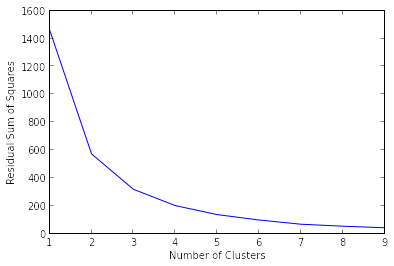

In [86]:
clusts = range(1, 10)

def kmean_rss_score(nclust):
    km = Pipeline([('scale', StandardScaler()), ('cluster', KMeans(nclust))])
    km.fit(X)
    rss = -km.score(X)
    return rss

rss = [kmean_rss_score(i) for i in clusts]
plt.plot(clusts, rss)
plt.xlabel('Number of Clusters')
plt.ylabel('Residual Sum of Squares')
plt.show()

In [271]:
# Separate predictors into numeric and categorical groups
numeric_predictors = [
    '1stFlrSF', 'BsmtFinSF1', 'TotalBsmtSF', 
    'LotArea', 'BsmtUnfSF', 'GarageArea',
    'OpenPorchSF', 'TotRmsAbvGrd',
    
    # COLUMNS WITH 50% > NULL/ZERO VALUES
    'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'LotFrontage', 'MasVnrArea', 'MiscVal', 
]
categorical_predictors = train_data.columns.difference(numeric_predictors)

In [123]:
(train_data).apply(lambda col: col == 0).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
                ... 
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
GrLivArea          0
FullBath           9
BedroomAbvGr       6
KitchenAbvGr       1
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces       690
FireplaceQu        0
GarageType         0
GarageYrBlt        0
GarageFinish 

TypeError: histogram() got an unexpected keyword argument 'new'

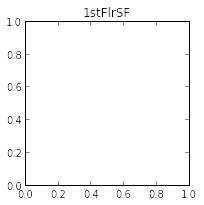

In [13]:
# Initialize plt
fig = plt.figure(figsize=(10, 10))

# Initialize count
count = 1

# Plot the figures
for numeric_predictor in numeric_predictors:
    ax = fig.add_subplot(3, 3, count, adjustable='box', aspect='equal')
    ax.set_title(numeric_predictor)
    ax.hist(train_data[numeric_predictor])
    count = count +1

In [64]:
train_data[numeric_predictors].head().T

,0,1,2,3,4
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0
3SsnPorch,0.0,0.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0
WoodDeckSF,0.0,298.0,0.0,0.0,192.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
ScreenPorch,0.0,0.0,0.0,0.0,0.0
MiscVal,0.0,0.0,0.0,0.0,0.0


In [195]:
train_data[categorical_predictors].head().T

,0,1,2,3,4
BedroomAbvGr,3,3,3,3,4
BldgType,1Fam,1Fam,1Fam,1Fam,1Fam
BsmtFullBath,1,0,1,1,1
BsmtHalfBath,0,1,0,0,0
CentralAir,Y,Y,Y,Y,Y
Condition1,Norm,Feedr,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm
Electrical,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr
ExterCond,TA,TA,TA,TA,TA
ExterQual,Gd,TA,Gd,TA,Gd


In [401]:
# Instantiate modules required for numeric predictors

def select_numeric_features(X):
    return X[numeric_predictors]

# Instantiate necessary modules
numeric_selector = FunctionTransformer(select_numeric_features, validate=False)
imp = Imputer(strategy='mean')
ss = StandardScaler()

# Instantiate modules required for categorical predictors

def select_categorical_features(X):
    return X[categorical_predictors]

scf = FunctionTransformer(select_categorical_features, validate=False)

def log_features(X):
    return map(lambda x: x if np.where(x == 0) else np.log(x), X) 

lf = FunctionTransformer(log_features, validate=False)

def ensure_datatype(X):
    return X.apply(lambda col: col.astype(str))

ed = FunctionTransformer(ensure_datatype, validate=False)

from sklearn.feature_extraction import DictVectorizer

def make_dictionaries(X):
    return X.to_dict(orient='records')

md = FunctionTransformer(make_dictionaries, validate=False)

def reject_outliers(X, m=3):
    return pd.DataFrame(map(lambda x: x[abs(x - np.mean(x)) > m * np.std(x)] = None, X.T)).T
    
ro = FunctionTransformer(reject_outliers, validate=False)

def drop_empty_column(X):
    return X.loc[:, (X != 0).any(axis=0)]

SyntaxError: lambda cannot contain assignment (<ipython-input-401-63c98fa87879>, line 36)

In [345]:
numeric_feature_pipeline = Pipeline(steps=[
    ('select', FunctionTransformer(select_numeric_features, validate=False)),
    ('impute', Imputer()),
    ('reject', FunctionTransformer(reject_outliers, validate=False)),
    #('drop', FunctionTransformer(drop_empty_column, validate=False)),
    ('log',  FunctionTransformer(log_features, validate=False)),
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('select', FunctionTransformer(select_categorical_features, validate=False)),
    ('datatype', FunctionTransformer(ensure_datatype, validate=False)),
    ('dictionaries', FunctionTransformer(make_dictionaries, validate=False)),
    ('vectorize', FeatureHasher())
])

fu = FeatureUnion([
    ('categorical', categorical_pipeline), 
    ('numeric', numeric_feature_pipeline)
])

fr = Pipeline([
    ('union', fu),
    ('reduction', TruncatedSVD())
])

In [114]:
search_params = {
    'preprocess__reduction__n_components': [10, 20, 50, 100, 200, 500, 1000],
    'preprocess__union__categorical__vectorize__n_features': [1000, 2000, 5000],
    'preprocess__union__numeric__impute__strategy': ['mean', 'median', 'most_frequent'],
    'predict__alpha': [1, 10, 50, 100, 200, 500]
}

In [397]:
num_features = train_data[numeric_predictors]
pd.DataFrame(reject_outliers(Imputer.fit_transform(Imputer(), num_features)))
#pd.DataFrame(log_features(Imputer.fit_transform(Imputer(), num_features)))
#pd.DataFrame(StandardScaler.fit_transform(StandardScaler(), log_features(reject_outliers(Imputer.fit_transform(Imputer(), num_features)))))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,856.0,706.0,856.0,8450.0,150.0,548.0,61.0,8.0,0.0,854.0,0.0,0.0,0.0,0.0,0.0,0.0,65.000000,196.0,0.0
1,1262.0,978.0,1262.0,9600.0,284.0,460.0,0.0,6.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,0.0,80.000000,0.0,0.0
2,920.0,486.0,920.0,11250.0,434.0,608.0,42.0,6.0,0.0,866.0,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,162.0,0.0
3,961.0,216.0,756.0,9550.0,540.0,642.0,35.0,7.0,0.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,0.0,0.0
4,1145.0,655.0,1145.0,14260.0,490.0,836.0,84.0,9.0,0.0,1053.0,0.0,192.0,0.0,0.0,0.0,0.0,84.000000,350.0,0.0
5,796.0,732.0,796.0,14115.0,64.0,480.0,30.0,5.0,0.0,566.0,0.0,40.0,0.0,0.0,0.0,0.0,85.000000,0.0,700.0
6,1694.0,1369.0,1686.0,10084.0,317.0,636.0,57.0,7.0,0.0,0.0,0.0,255.0,205.0,0.0,0.0,0.0,75.000000,186.0,0.0
7,1107.0,859.0,1107.0,10382.0,216.0,484.0,204.0,7.0,32.0,983.0,0.0,235.0,0.0,0.0,0.0,0.0,70.065833,240.0,350.0
8,1022.0,0.0,952.0,6120.0,952.0,468.0,0.0,8.0,0.0,752.0,0.0,90.0,0.0,0.0,0.0,0.0,51.000000,0.0,0.0
9,1077.0,851.0,991.0,7420.0,140.0,205.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,0.0,0.0


In [372]:
pd.DataFrame(StandardScaler.fit_transform(StandardScaler(), log_features(reject_outliers(Imputer.fit_transform(Imputer(), num_features)))))

ValueError: setting an array element with a sequence.

In [370]:
#search_params_numeric = {
#    'impute__strategy': ['mean', 'median', 'most_frequent'],
#}
#num_features = train_data[numeric_predictors]
#print len(num_features[1])
#num_features[1][abs(num_features[1]) - np.mean(num_features[1]) < 3 * np.std(num_features[1])]

#drop_empty_column(reject_outliers(num_features))

pd.DataFrame(log_features(reject_outliers(Imputer.fit_transform(Imputer(), num_features))))

#pd.DataFrame(Imputer.fit_transform(Imputer(), (num_features)))
#col[col.isnull()]
#col = num_features.T[15]
#print np.mean(col)
#print abs(512 - np.mean(col))
#print 3 * np.std(col)

#reject_outliers(num_features)[15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,856.0,706.0,856.0,150.0,548.0,61.0,8.0,0.0,854.0,0.0,0.0,0.0,0.0,0.0,0.0,65.000000,196.0,0.0
1,1262.0,978.0,1262.0,284.0,460.0,0.0,6.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,0.0,80.000000,0.0,0.0
2,920.0,486.0,920.0,434.0,608.0,42.0,6.0,0.0,866.0,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,162.0,0.0
3,961.0,216.0,756.0,540.0,642.0,35.0,7.0,0.0,756.0,0.0,0.0,272.0,0.0,0.0,0.0,60.000000,0.0,0.0
4,1145.0,655.0,1145.0,490.0,836.0,84.0,9.0,0.0,1053.0,0.0,192.0,0.0,0.0,0.0,0.0,84.000000,350.0,0.0
5,796.0,732.0,796.0,64.0,480.0,30.0,5.0,0.0,566.0,0.0,40.0,0.0,320.0,0.0,0.0,85.000000,0.0,700.0
6,1694.0,1369.0,1686.0,317.0,636.0,57.0,7.0,0.0,0.0,0.0,255.0,0.0,0.0,0.0,0.0,75.000000,186.0,0.0
7,1107.0,859.0,1107.0,216.0,484.0,204.0,7.0,32.0,983.0,0.0,235.0,228.0,0.0,0.0,0.0,70.065833,240.0,350.0
8,1022.0,0.0,952.0,952.0,468.0,0.0,8.0,0.0,752.0,0.0,90.0,205.0,0.0,0.0,0.0,51.000000,0.0,0.0
9,1077.0,851.0,991.0,140.0,205.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,0.0,0.0


In [350]:
model_pipe_ridge = Pipeline(steps=[
    ('preprocess', fr),
    ('predict', Ridge(alpha=100))
])

In [351]:
grid_search = GridSearchCV(model_pipe_ridge, search_params, cv=5)
clf_ridge = grid_search.fit(train_data, np.log(train_price))
grid_search.best_params_

ValueError: setting an array element with a sequence.

In [28]:
prices = np.exp(clf_ridge.predict(test_data))

In [29]:
test_data['SalePrice'] = prices
columns_submission = ['Id', 'SalePrice']
test_data.to_csv('tako_hisada_submission_20180410_ridge_03.csv', columns=columns_submission, index=False)

In [312]:
model_pipe_lasso = Pipeline(steps=[
    ('preprocess', fu),
    ('predict', Lasso(alpha=100))
])

In [313]:
grid_search = GridSearchCV(model_pipe_lasso, search_params, cv=5)
train_price_trimmed = train_price.drop([15])
clf_lasso = grid_search.fit(train_data, np.log(train_price_trimmed))
grid_search.best_params_

{'predict__alpha': 1,
 'preprocess__categorical__vectorize__n_features': 5,
 'preprocess__numeric__impute__strategy': 'mean'}

In [314]:
prices = np.exp(clf_lasso.predict(test_data))

In [315]:
test_data['SalePrice'] = prices
columns_submission = ['Id', 'SalePrice']

In [316]:
test_data.to_csv('tako_hisada_submission_20180330_lasso_02.csv', columns=columns_submission, index=False)

In [317]:
model_pipe_logistic_regression = Pipeline(steps=[
    ('preprocess', fu),
    ('predict', LogisticRegression())
])

In [318]:
search_params_lr = {
    #'preprocess__reduction__n_components': [2, 3, 4, 5, 10, 20],
    'preprocess__categorical__vectorize__n_features': [5, 15, 75, 100, 200],
    'preprocess__numeric__impute__strategy': ['mean', 'median', 'most_frequent'],
    'predict__C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100, 1000, 1e18]
}

In [ ]:
grid_search = GridSearchCV(model_pipe_logistic_regression, search_params_lr, cv=5)
clf_lr = grid_search.fit(train_data, train_price)
grid_search.best_params_

In [70]:
prices = clf_lr.predict(test_data)

In [71]:
test_data['SalePrice'] = prices
columns_submission = ['Id', 'SalePrice']
test_data.to_csv('tako_hisada_submission_20180327_logistic-regression_02.csv', columns=columns_submission, index=False)